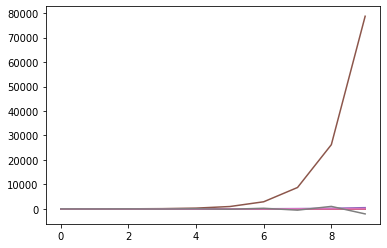

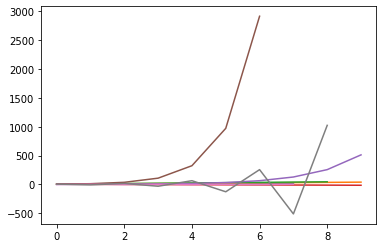

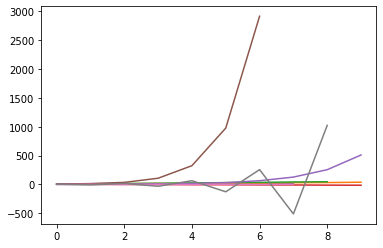

[[   0    0    2    3    6    8   13   12   13   17]
 [   3    7   11   16   17   23   22   30   32   38]
 [   0    5   11   16   20   26   31   35   42   46]
 [   3    0   -1   -2   -5   -6   -9  -10  -13  -14]
 [   1    2    6    8   16   31   64  127  255  510]
 [   0    0    0    4   14   35  107  325  977 2917]
 [   0    0   -2    2   -2    2   -2    2   -2    2]
 [   0    4   -8   16  -32   64 -128  256 -512 1024]]
[[[   0]
  [   0]
  [   2]
  [   3]
  [   6]
  [   8]
  [  13]
  [  12]
  [  13]
  [  17]]

 [[   3]
  [   7]
  [  11]
  [  16]
  [  17]
  [  23]
  [  22]
  [  30]
  [  32]
  [  38]]

 [[   0]
  [   5]
  [  11]
  [  16]
  [  20]
  [  26]
  [  31]
  [  35]
  [  42]
  [  46]]

 [[   3]
  [   0]
  [  -1]
  [  -2]
  [  -5]
  [  -6]
  [  -9]
  [ -10]
  [ -13]
  [ -14]]

 [[   1]
  [   2]
  [   6]
  [   8]
  [  16]
  [  31]
  [  64]
  [ 127]
  [ 255]
  [ 510]]

 [[   0]
  [   0]
  [   0]
  [   4]
  [  14]
  [  35]
  [ 107]
  [ 325]
  [ 977]
  [2917]]

 [[   0]
  [   0]
  [  

NameError: name 'y_tr' is not defined

In [2]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd

from keras.preprocessing import sequence
np.random.seed(7)

XXX=[
   [2 , 4 , 6 , 8 , 10 , 12 , 14 , 16 , 18 , 20 ],
   [3 , 7 , 11 , 15 , 19 , 23 , 27 , 31 , 35 , 39],
   [5 , 10 , 15 , 20 , 25 , 30 , 35 , 40 , 45 , 50],
   [3 , 1 , -1 , -3 , -5 , -7 , -9 , -11 , -13 , -15],
   [1 , 2 , 4 , 8 , 16 , 32 , 64 , 128 , 256 , 512],
   [4 , 12 , 36 , 108 , 324 , 972 , 2916 , 8748 , 26244 , 78732],
   [-2 , 2 , -2 , 2 , -2 , 2 , -2 , 2 , -2 , 2 ],
   [4 , -8 , 16 , -32 , 64 , -128 , 256 , -512 , 1024 , -2048]
]


XX=[
   [2 , 4 , 6 , 8 , 10 , 12 , 14 , 16 ],
   [3 , 7 , 11 , 15 , 19 , 23 , 27 , 31 , 35 , 39],
   [5 , 10 , 15 , 20 , 25 , 30 , 35 , 40 , 45],
   [3 , 1 , -1 , -3 , -5 , -7 , -9 , -11 , -13 , -15],
   [1 , 2 , 4 , 8 , 16 , 32 , 64 , 128 , 256 , 512],
   [4 , 12 , 36 , 108 , 324 , 972 , 2916 ],
   [-2 , 2 , -2 , 2 , -2 , 2 , -2 , 2  ],
   [4 , -8 , 16 , -32 , 64 , -128 , 256 , -512 , 1024]
]


X=[
   [2 , 3 , 6 , 8 , 13 , 12 , 13 , 17 ],
   [3.3 , 7 , 11 , 16 , 17 , 23 , 22 , 30 , 32 , 38],
   [5 , 11 , 16 , 20 , 26 , 31 , 35 , 42 , 46],
   [3 , 0 , -1 , -2 , -5 , -6 , -9 , -10 , -13 , -14],
   [1 , 2 , 6 , 8 , 16 , 31 , 64 , 127 , 255 , 510],
   [4 , 14 , 35 , 107 , 325 , 977 , 2917],
   [-2 , 2 , -2 , 2 , -2 , 2 , -2 , 2  ],
   [4 , -8 , 16 , -32 , 64 , -128 , 256 , -512 , 1024]
]

from matplotlib import pyplot as plt
for x in XXX:
    plt.plot(x)
plt.show()

for x in XX:
    plt.plot(x)
plt.show()

for x in X:
    plt.plot(x)
plt.show()

Y = [[1,0],[1,0],[1,0],[1,0],[0,1],[0,1],[0,1],[0,1]]





max_review_length = 10
X_tr = sequence.pad_sequences(X, maxlen=max_review_length)
print(X_tr)


X_tr = X_tr.reshape( 8, 10,-1)
print(X_tr)

modelClass = Sequential()
modelClass.add(LSTM(100, input_shape=(10,1)))
modelClass.add(Dense(2, activation='sigmoid'))
modelClass.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelClass.summary())
modelClass.fit(X_tr, y_tr, epochs=10, batch_size=2)

scores = modelClass.evaluate(X_tr, y_tr, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

X_tst=[
       [5 , 10 , 20 , 40 , 80 , 160 , 320 , 640 ],
       [2 , 7, 11 , 15 , 18 , 21 , 25 , 30 , 34]
      ]
X_tst = sequence.pad_sequences(X_tst, maxlen=max_review_length)
print(X_tst)

X_tst = X_tst.reshape( 2, 10,-1)
print(modelClass.predict_classes(X_tst))

In [0]:
i=1
a=2
d=4
while i<=10:
    print(a,',',end=' ')
    a+=d
    i+=1

2 , 6 , 10 , 14 , 18 , 22 , 26 , 30 , 34 , 38 , 